### Importing Libraries


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset & Extracting Features

In [4]:

dis_train = pd.read_csv('../../../data/dateset1/Training.csv')
dis_test = pd.read_csv('../../../data/dateset1/Testing.csv')
X_train = dis_train.iloc[:, :-1].values
y_train = dis_train.iloc[:, -1].values
X_test = dis_test.iloc[:, :-1].values
y_test = dis_test.iloc[:, -1].values


In [5]:
print(X_train)
print(y_train)
print("")
print(X_test)
print(y_test)

[[1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 1 1 1]]
['Fungal infection' 'Fungal infection' 'Fungal infection' ...
 'Urinary tract infection' 'Psoriasis' 'Impetigo']

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 1 1 1]]
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection

### Model Training & Predicting

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Model Evalaution

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print()
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred))

1.0



### HyperParameter Tuning


In [8]:
# from sklearn.model_selection import GridSearchCV

In [9]:
# # clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=5)
# param_grid = {'n_estimators':list(range(1,100)),
#                'max_depth' : list(range(1,10)),
#                'max_leaf_nodes' : list(range(2,20))
#                }

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
# grid_search.fit(X_train, y_train)
# grid_search.predict(X_test)

### Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold
cVal = 10

In [11]:

score = cross_val_score(clf, X_train, y_train,cv=cVal,)
print(score) 
print(score.mean()) 


[0.97560976 0.98780488 0.96747967 0.97764228 0.98780488 1.
 1.         0.97560976 0.97560976 0.95121951]
0.9798780487804878


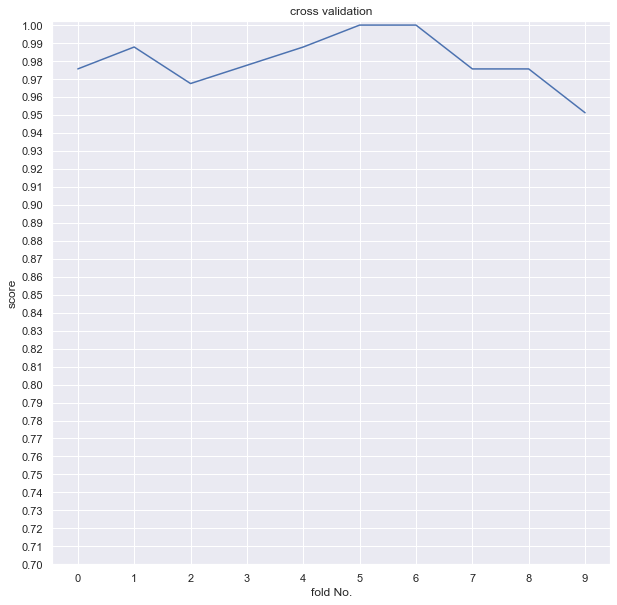

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(range(0,cVal), score)

plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0.7, 1, 0.01))

plt.show()

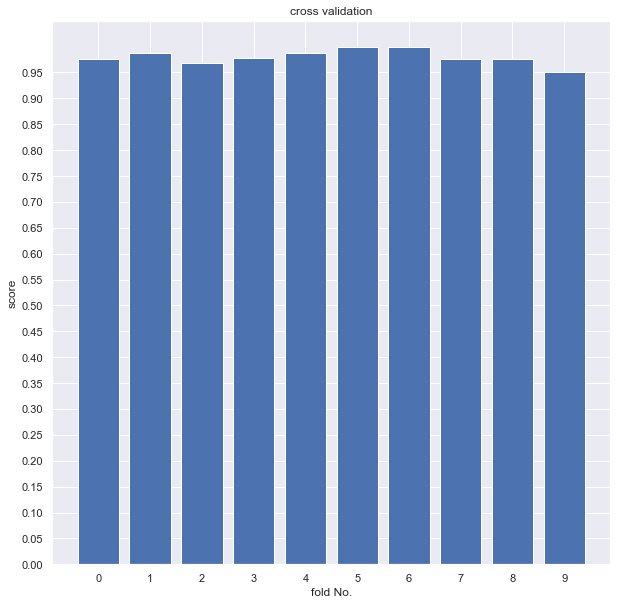

In [13]:
plt.figure(figsize=(10, 10))
plt.bar(range(0,cVal), score)
# plt.plot(range(0,20), scores)

plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0, 1, 0.05))

plt.show()

#### Kfold cross validation Cross Validation (KFCV)

In [14]:
cVal2 = 10

In [15]:
from sklearn.model_selection import KFold
kfcv = KFold(n_splits=cVal2 ,shuffle=True, random_state=42)
score2 = cross_val_score(clf, X_train, y_train,cv=kfcv)

print(score2) 
print(score2.mean()) 

[0.97357724 0.93699187 0.95731707 0.87195122 0.88821138 0.93495935
 0.91666667 0.95325203 0.89430894 0.9898374 ]
0.9317073170731709
